<a href="https://colab.research.google.com/github/mjpuma/FoodPriceCausation/blob/main/TigramiteCausation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Food Commodity Price Network Exploration**
### **Mitchell Thomas, Michael J. Puma**
**International Research Institute for Climate and Society, Earth Insitute, Columbia University**

###**1. Set Parameters**  
* Key parameters include parameters that should be changed depending on basic goals of the test. 
* Sensitivity paramters determine how sensitive the detection algorithm will be and how many false positives/false negatives will exist in the data
* Additional test parameters give more direct control over the parameters of the study
* Display parameters allows control of printed outputs and graphs

**Note about Google Earth Engine:**
Google Earth Engine is a geospatial data processing tool that allows for up to date access of environmental variables. **However, it requires an authorization and login to proceed (free with academic use).** Set *use_gee* to *True* to use this functionality or *False* to use possibly outdated data. 



In [9]:
# ---- key parameters ----
country = 'Ethiopia' # country of study, optimized for senegal 
                    # but can choose any country/commodity pair at FPMA portal:
                    # https://fpma.apps.fao.org/giews/food-prices/tool/public/#/dataset/domestic
commodity = 'Maize'  #commodity to study: optimized for 'Rice' or 'Millet' in Senegal 
min_lag, max_lag  = 1,4  # minimum and maximum lag of causal links
add_enviro = False # whether or not to add environmental variables to study. (currently only available for Senegal)
use_gee =  True # use Google Earth Engine to obtain most up to date environmental time series.
                # If True, requires valid Earth Engine login. 
                # If False, data ends in April 2021.

# ---- sensitivity parameters ----
FDR_bool = False # whether or not to implement the Benjamini-Hochberg false discovery test
alpha = 0.05 #level of MCI p-val cutoff

# ---- additional test parameters -----
m_y_conditioning = True 
interpolate = False
max_gap= 3
stationarity_method = 'firstdifference'

# ---- display parameters
print_info = False # Whether or not to provide printed outputs for all steps of test
print_graphs = True # print spatial and link graph

#if using Google Earth Engine to obtain up to date environmental data
import ee
if use_gee and not ee.data._credentials:
  ee.Authenticate()  # Trigger the authentication flow.
  ee.Initialize() # Initialize the library.

# any additional time series to use as predictors. Pass through dictionary of form:
# {'ts_name1' : timeseries1, 'ts_name2' : timeseries2, ...} 
# where timeseries1, timeseries2 are pandas series of AT LEAST monthly frequency with a datetime index
additional_ts = {}



###**2. Install Dependencies**

Install necessary packages and codes which are not included in Google Colab. Most source code is in the github for this project: https://github.com/mitchellthomas1/SenegalCodes.
This github is imported and stored as a local path.

In [2]:
#--install required dependencies--
!pip install geopandas #install geopandas library
!pip install OSMPythonTools
!rm -rf SenegalCodes/ # remove old version if needed
!git clone https://github.com/mitchellthomas1/SenegalCodes.git #clone files from github
import sys
sys.path.insert(0,'/content/SenegalCodes') #link those files to local system in google colab

from tigramitecausationsupdated import run_test

     |████████████████████████████████| 1.0MB 2.9MB/s 
     |████████████████████████████████| 6.5MB 28.2MB/s 
     |████████████████████████████████| 15.3MB 240kB/s 
     |████████████████████████████████| 92kB 10.3MB/s 
  Found existing installation: click 8.0.0
    Uninstalling click-8.0.0:
      Successfully uninstalled click-8.0.0
     |████████████████████████████████| 184kB 2.9MB/s 
  Created wheel for OSMPythonTools: filename=OSMPythonTools-0.3.0-cp37-none-any.whl size=13025 sha256=f14c5db9ed761ff708e0f6986d0fba14e9aadb93a6eec4954aedad0f4e258a9b
  Stored in directory: /root/.cache/pip/wheels/8b/5b/c9/808660b16cb9745083a31339c69ec9776e09eb40f2164c6565
  Created wheel for pytest-sugar: filename=pytest_sugar-0.9.4-py2.py3-none-any.whl size=8971 sha256=2ea09c15487d90db97df5255e31cedf705df9f1a919f98168eeb189f3fc6b727
  Stored in directory: /root/.cache/pip/wheels/72/ac/7f/55050ee786fa4a2bb2d05dea0696eab826ff1d5b8a7dbd5883
Successfully built OSMPythonTools pytest-sugar
Cloning into '

###**3. Run Test**
Run test based on parameters set and display dataframe with links

/content/SenegalCodes/tigramitecausationsupdated.py:314: UserWarning: Only 4 time series found for Maize --> Ethiopia with minimum size of 160. Decrease minimum_size parameter or choose different country/commodity for better results
  .format(study_data.shape[1], commodity, country, minimum_size))


Addis Ababa  causes  Bahirdar
Addis Ababa  causes  Mekele
Bahirdar  causes  Addis Ababa
Bahirdar  causes  Mekele
Diredawa  causes  Addis Ababa
Mekele  causes  Diredawa


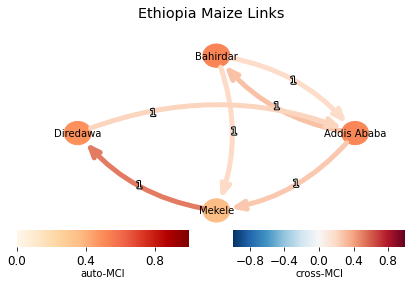

[nominatim] downloading data: search


Addis Ababa Bahirdar
Addis Ababa Mekele
Bahirdar Addis Ababa
Bahirdar Mekele
Diredawa Addis Ababa
Mekele Diredawa
Addis Ababa  not found
Bahirdar  not found


[nominatim] downloading data: search


Diredawa  not found


[nominatim] downloading data: search


Mekele  not found
(0.295868744247508, 0.2690971416381199, 0.19185163352513795, 0.20095815781417808, 0.2190723599272622, 0.516739220894604)


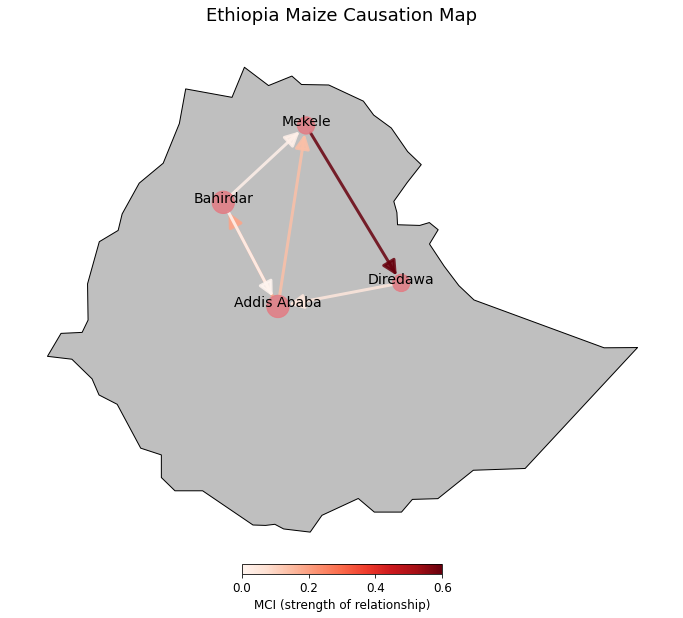



 ### Causation Links: ###



,Caused By,Causes,MCI-val,P-val
0,Addis Ababa,Bahirdar,0.295869,0.0008
1,Addis Ababa,Mekele,0.269097,0.0022
2,Bahirdar,Addis Ababa,0.191852,0.0307
3,Bahirdar,Mekele,0.200958,0.0224
4,Diredawa,Addis Ababa,0.219072,0.0126
5,Mekele,Diredawa,0.516739,0.0000


In [10]:
# Call to run test
link_df = run_test(country, commodity, FDR_bool, min_lag, max_lag, add_enviro, 
  alpha, m_y_conditioning = m_y_conditioning, interpolate = interpolate,
  max_gap= max_gap, stationarity_method = stationarity_method, print_info = print_info,
  use_gee = use_gee, print_graphs = print_graphs)
print('\n\n ### Causation Links: ###\n')
link_df